# Importing the Libraries and Mounting the Drive

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [179]:
# Load the list from the binary file
import pickle

file_name = "data_storage.bin"

with open(file_name, "rb") as file:
    data_storage = pickle.load(file)

print("Data loaded from binary file:")
print(data_storage)

Data loaded from binary file:
[['no force', -348.0, -349.0, -343.0, -335.0, -327.0, -325.0, -334.0, -335.0, -345.0, -356.0, -343.0, -308.0, -293.0, -332.0, -389.0, -396.0, -339.0, -282.0, -284.0, -333.0, -372.0, -370.0, -347.0, -332.0, -328.0, -325.0, -322.0, -330.0, -345.0, -355.0, -350.0, -337.0, -330.0, -329.0, -330.0, -332.0, -335.0, -342.0, -347.0, -346.0, -340.0, -333.0, -328.0, -327.0, -332.0, -338.0, -346.0, -349.0, -345.0, -337.0, -328.0, -324.0, -328.0, -337.0, -345.0, -350.0, -348.0, -339.0, -329.0, -323.0, -326.0, -335.0, -344.0, -350.0, -349.0, -341.0, -332.0, -325.0, -325.0, -332.0, -341.0, -349.0, -349.0, -343.0, -335.0, -327.0, -325.0, -329.0, -337.0, -346.0, -350.0, -346.0, -337.0, -329.0, -324.0, -327.0, -335.0, -343.0, -349.0, -348.0, -341.0, -332.0, -325.0, -325.0, -332.0, -341.0, -348.0, -349.0, -344.0, -336.0, -327.0, -324.0, -329.0, -337.0, -346.0, -350.0, -347.0, -338.0, -329.0, -324.0, -326.0, -335.0, -343.0, -349.0, -348.0, -341.0, -332.0, -325.0, -325.0, -331

In [180]:
# Labels to extract
labels_to_extract = {'no force','strong', 'small', 'medium'}

# Extract matching rows
filtered_data = [row for row in data_storage if row[0] in labels_to_extract]

# Determine the minimum row length
min_length = min(len(row) for row in filtered_data)

# Truncate rows to the minimum length
truncated_data = [row[:min_length] for row in filtered_data]

# Convert to numpy array (optional)
filtered_data_array = np.array(truncated_data)

# Display the result
print("Filtered Data (Minimum Length):")
print(filtered_data_array)

Filtered Data (Minimum Length):
[['no force' '-348.0' '-349.0' ... '-349.0' '-349.0' '-343.0']
 ['no force' '-337.0' '-335.0' ... '-322.0' '-327.0' '-337.0']
 ['no force' '-337.0' '-335.0' ... '-344.0' '-333.0' '-323.0']
 ...
 ['strong' '-337.0' '-335.0' ... '-341.0' '-340.0' '-337.0']
 ['strong' '-337.0' '-335.0' ... '-341.0' '-337.0' '-334.0']
 ['strong' '-337.0' '-334.0' ... '-341.0' '-338.0' '-335.0']]


In [5]:
len(filtered_data_array)

50

In [6]:
# Decision Tree Model

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# 提取特征和标签
labels_to_numeric = {'no force': 3,'strong': 2, 'medium': 1, 'small': 0}  # Label encoding
numeric_to_labels = {v: k for k, v in labels_to_numeric.items()}  # Reverse mapping
X = []
y = []

for row in filtered_data_array:
    label = row[0]
    features = list(map(float, row[1:]))  # Convert to float
    X.append(features)
    y.append(labels_to_numeric[label])

X = np.array(X)
y = np.array(y)

# 增加特征：均值、标准差、最小值、最大值
X_processed = np.column_stack([
    np.mean(X, axis=1),
    np.std(X, axis=1),
    np.min(X, axis=1),
    np.max(X, axis=1)
])

# 数据划分：Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2,random_state=42)

# 创建并训练分类器（限制树深度并平衡类别权重）
classifier = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight='balanced')
classifier.fit(X_train, y_train)

# 测试分类器
y_pred = classifier.predict(X_test)

# 打印测试数据集内容
print("Test Data Details:")
for i, (features, true_label, predicted_label) in enumerate(zip(X_test, y_test, y_pred)):
    print(f"Test Sample {i + 1}: Features={features}, True Label={numeric_to_labels[true_label]}, Predicted Label={numeric_to_labels[predicted_label]}")

# 分类报告
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['small', 'medium', 'strong']))


Test Data Details:
Test Sample 1: Features=[-337.00585366    8.85553237 -392.         -279.        ], True Label=small, Predicted Label=medium
Test Sample 2: Features=[-337.00829268   36.30369772 -620.          -74.        ], True Label=strong, Predicted Label=strong
Test Sample 3: Features=[-337.           10.69556553 -396.         -269.        ], True Label=medium, Predicted Label=medium
Test Sample 4: Features=[-337.00195122   88.03836191 -680.           29.        ], True Label=strong, Predicted Label=strong
Test Sample 5: Features=[-337.0195122   10.2395984 -364.        -309.       ], True Label=small, Predicted Label=medium
Test Sample 6: Features=[-337.00341463   37.4084181  -508.         -175.        ], True Label=strong, Predicted Label=strong
Test Sample 7: Features=[-337.01073171   15.10793305 -403.         -270.        ], True Label=medium, Predicted Label=medium
Test Sample 8: Features=[-337.           11.44744087 -403.         -259.        ], True Label=medium, Predicted 

# Now we are going to do further data analysis

## First let us manipulate one piece of data

In [264]:
import numpy as np

# 示例数据：从你的 filtered_data_array 中提取信号数据
signal = np.array(filtered_data_array[29][1:])  # 假设第 4 行是你感兴趣的数据
label = filtered_data_array[29][0]
signal = signal.astype(float)  # 转换为 float 类型

# **Step 1: 计算 IQR (Interquartile Range) 来过滤异常值**
q1 = np.percentile(signal, 25)  # 第一四分位数
q3 = np.percentile(signal, 75)  # 第三四分位数
iqr = q3 - q1  # 四分位间距

# 定义上下限
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 过滤掉异常值（用于计算差分）
filtered_signal = np.clip(signal, lower_bound, upper_bound)

# **Step 2: 计算信号差分，并分析统计特性**
signal_diff = np.abs(np.diff(filtered_signal))

# 分析差分数据的统计特性
mean_diff = np.mean(signal_diff)
std_diff = np.std(signal_diff)
percentile_90 = np.percentile(signal_diff, 90)  # 90% 分位数

# 自动选择阈值
threshold_mean_std = mean_diff + 2 * std_diff  # 均值 + 2倍标准差
threshold_percentile = percentile_90  # 或使用 90% 分位数
threshold = max(threshold_mean_std, threshold_percentile)  # 选择较大值作为阈值

# 找到波动区域索引
wave_indices = np.where(signal_diff > threshold)[0]

# 提取索引范围内的原始信号数据
if len(wave_indices) > 0:
    start_idx = max(wave_indices[0] - 1, 0)  # 波动前的起点
    end_idx = min(wave_indices[-1] + 2, len(signal))  # 波动后的终点
    wave_signal = signal[start_idx:end_idx]  # 从原始信号提取
else:
    start_idx, end_idx = 0, 0  # 如果没有波动部分
    wave_signal = []

# 打印分析结果
print(f"Threshold: {threshold:.2f}")
print(f"Index Range: [{start_idx}, {end_idx}]")
print(f"Extracted Wave Signal: {wave_signal}")


Threshold: 21.90
Index Range: [4, 1931]
Extracted Wave Signal: [-354. -338. -306. ... -362. -343. -321.]


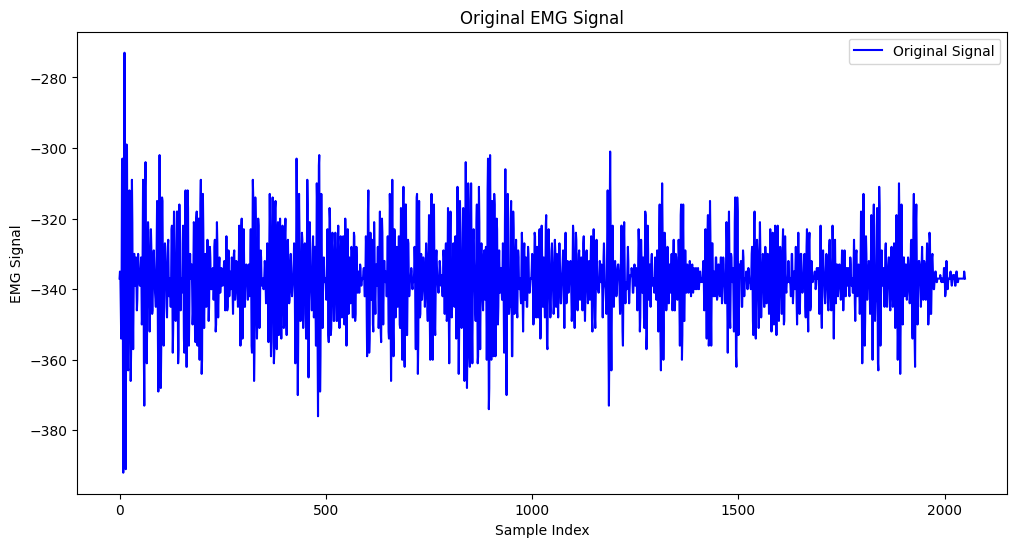

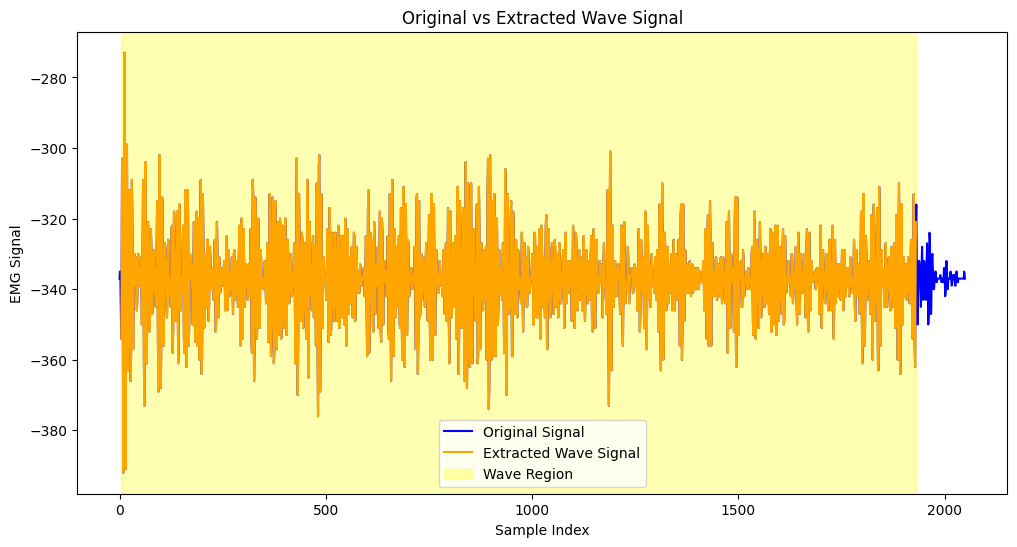

In [265]:
import matplotlib.pyplot as plt

# 原始图
plt.figure(figsize=(12, 6))
plt.plot(signal, label="Original Signal", color="blue")
plt.xlabel("Sample Index")
plt.ylabel("EMG Signal")
plt.title("Original EMG Signal")
plt.legend()
plt.show()

# 对比提取结果
plt.figure(figsize=(12, 6))
plt.plot(signal, label="Original Signal", color="blue")
if len(wave_signal) > 0:
    plt.plot(range(start_idx, end_idx), wave_signal, label="Extracted Wave Signal", color="orange")
    plt.axvspan(start_idx, end_idx, color='yellow', alpha=0.3, label="Wave Region")
plt.xlabel("Sample Index")
plt.ylabel("EMG Signal")
plt.title("Original vs Extracted Wave Signal")
plt.legend()
plt.show()


In [211]:
label

'small'

## Here we can process the one with label "no force"

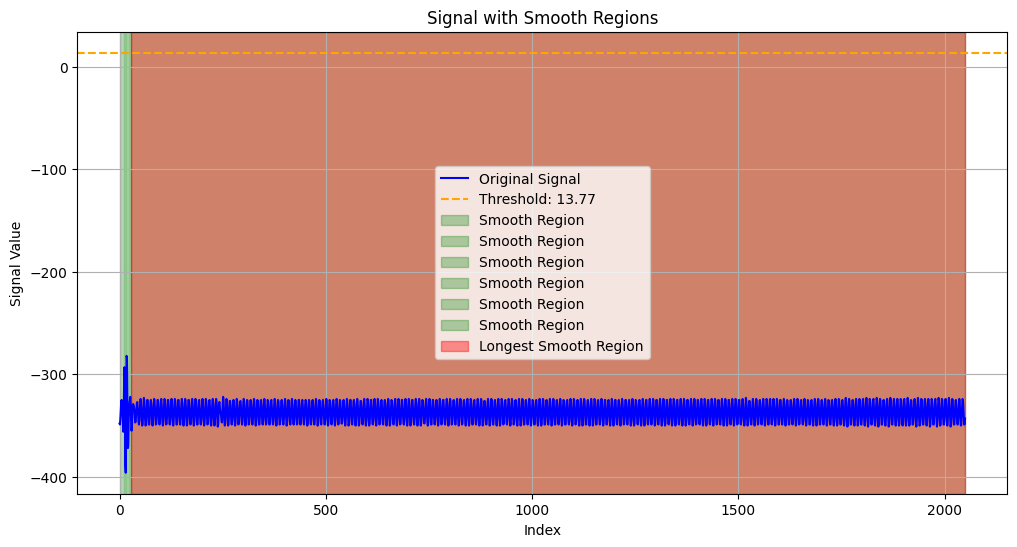

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据：假设已提取到标签为 'noforce' 的信号
signal = np.array(filtered_data_array[0][1:])  # 假设第一个样本是 'noforce'
signal = signal.astype(float)  # 转换为 float 类型

# 计算信号的绝对差分
signal_diff = np.abs(np.diff(signal))

# 分析差分数据的统计特性
mean_diff = np.mean(signal_diff)
std_diff = np.std(signal_diff)
percentile_90 = np.percentile(signal_diff, 90)  # 90% 分位数

# 自动选择阈值
threshold_mean_std = mean_diff + 2 * std_diff  # 均值 + 2 倍标准差
threshold_percentile = percentile_90  # 或使用 90% 分位数
threshold = max(threshold_mean_std, threshold_percentile)  # 选择较大值作为阈值

# 找到差分小于等于阈值的索引，即平滑区域
smooth_indices = np.where(signal_diff <= threshold)[0]

# 初始化平滑区域的起始和结束索引列表
smooth_segments = []
start_idx = None
prev_idx = None

# 遍历平滑索引，识别连续区域
for idx in smooth_indices:
    if start_idx is None:
        start_idx = idx
    elif idx != prev_idx + 1:
        end_idx = prev_idx + 1
        smooth_segments.append((start_idx, end_idx))
        start_idx = idx
    prev_idx = idx

# 添加最后一个平滑区域
if start_idx is not None:
    smooth_segments.append((start_idx, prev_idx + 1))

# 提取平滑连续区域的信号
smooth_signals = [signal[start:end + 1] for start, end in smooth_segments]

# 找到最长的平滑连续区域
if smooth_segments:
    longest_segment_idx = np.argmax([end - start for start, end in smooth_segments])
    longest_start_idx, longest_end_idx = smooth_segments[longest_segment_idx]
    longest_smooth_signal = signal[longest_start_idx:longest_end_idx + 1]
else:
    longest_start_idx, longest_end_idx = 0, 0
    longest_smooth_signal = np.array([])

# 绘制信号及平滑区域
plt.figure(figsize=(12, 6))
plt.plot(signal, label='Original Signal', color='blue')
plt.axhline(threshold, color='orange', linestyle='--', label=f'Threshold: {threshold:.2f}')

# 标记平滑区域
for start, end in smooth_segments:
    plt.axvspan(start, end, color='green', alpha=0.3, label='Smooth Region')

# 标记最长平滑区域
if len(longest_smooth_signal) > 0:
    plt.axvspan(longest_start_idx, longest_end_idx, color='red', alpha=0.4, label='Longest Smooth Region')

# 添加图例和标题
plt.title("Signal with Smooth Regions")
plt.xlabel("Index")
plt.ylabel("Signal Value")
plt.legend()
plt.grid(True)
plt.show()


In [64]:
signal


array([-336., -334., -335., ..., -331., -341., -350.])

## Then we are going to split the array into 0.2 second block each

In [14]:
label

'small'

In [28]:
import numpy as np

# 定义分区大小 (0.3 秒窗口)
sample_rate = 500  # 采样率为 500 Hz
window_size = int(sample_rate * 0.2)  # 每个窗口的数据点数量

# 计算可以分割的完整窗口数量
num_partitions = len(wave_signal) // window_size

# 丢弃不足一个完整窗口的数据
partitioned_signal = wave_signal[:num_partitions * window_size]

# 按窗口大小分割信号
signal_partitions = np.array(np.split(partitioned_signal, num_partitions))

# 将分区和标签存储在一个数组中
labeled_array = []
for partition in signal_partitions:
    labeled_array.append(np.append(partition, label))  # 将标签添加到分区数据后面

# 转换为 NumPy 数组
labeled_array = np.array(labeled_array, dtype=object)

# 输出结果
print("Labeled Array:")
print(labeled_array)

Labeled Array:
[['-347.0' '-360.0' '-341.0' ... '-353.0' '-324.0' 'small']
 ['-302.0' '-311.0' '-340.0' ... '-341.0' '-335.0' 'small']
 ['-330.0' '-330.0' '-331.0' ... '-342.0' '-332.0' 'small']
 ...
 ['-326.0' '-325.0' '-330.0' ... '-347.0' '-342.0' 'small']
 ['-331.0' '-319.0' '-320.0' ... '-343.0' '-331.0' 'small']
 ['-323.0' '-325.0' '-333.0' ... '-338.0' '-324.0' 'small']]


In [29]:
len(labeled_array)

11

In [30]:
len(labeled_array[0])

101

# Now let's do the next step and construct a new array to store the slciing results

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据：filtered_data_array 是包含多个样本的列表
# 每个样本是一个列表，第一个元素是标签，后续元素是信号值

# 存储所有切片结果的 2D 数组
result_array = []

# 遍历所有样本
for sample in filtered_data_array:
    label = sample[0]
    signal = np.array(sample[1:], dtype=float)

    # **Step 1: 过滤异常值 (仅用于有力信号的分析)**
    if label == 'force':
        q1 = np.percentile(signal, 25)
        q3 = np.percentile(signal, 75)
        iqr = q3 - q1

        # 定义上下限
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # 过滤掉异常值
        filtered_signal = np.clip(signal, lower_bound, upper_bound)
    else:
        filtered_signal = signal  # 对于无力信号，直接使用原信号

    # **Step 2: 计算信号差分，并识别区域**
    signal_diff = np.abs(np.diff(filtered_signal))
    mean_diff = np.mean(signal_diff)
    std_diff = np.std(signal_diff)
    percentile_90 = np.percentile(signal_diff, 90)

    # 自动选择阈值
    threshold_mean_std = mean_diff + 2 * std_diff
    threshold_percentile = percentile_90
    threshold = max(threshold_mean_std, threshold_percentile)

    if label != 'no force':
        # 找到波动区域索引
        wave_indices = np.where(signal_diff > threshold)[0]
        if len(wave_indices) > 0:
            start_idx = max(wave_indices[0] - 1, 0)
            end_idx = min(wave_indices[-1] + 2, len(signal))
            sliced_signal = signal[start_idx:end_idx]
        else:
            continue  # 如果没有波动区域，跳过此样本
    elif label == 'no force':
        # 找到平滑区域索引
        smooth_indices = np.where(signal_diff <= threshold)[0]
        smooth_segments = []
        start_idx = None
        prev_idx = None

        # 遍历平滑索引，识别连续区域
        for idx in smooth_indices:
            if start_idx is None:
                start_idx = idx
            elif idx != prev_idx + 1:
                end_idx = prev_idx + 1
                smooth_segments.append((start_idx, end_idx))
                start_idx = idx
            prev_idx = idx
        if start_idx is not None:
            smooth_segments.append((start_idx, prev_idx + 1))

        if smooth_segments:
            # 选择最长的平滑区域
            longest_segment_idx = np.argmax([end - start for start, end in smooth_segments])
            start_idx, end_idx = smooth_segments[longest_segment_idx]
            sliced_signal = signal[start_idx:end_idx + 1]
        else:
            continue  # 如果没有平滑区域，跳过此样本

    # **Step 3: 分区切片**
    sample_rate = 500  # 假设采样率为 500 Hz
    window_size = int(sample_rate * 0.2)  # 每个窗口的大小（0.2 秒窗口）
    num_partitions = len(sliced_signal) // window_size

    if num_partitions == 0:
        continue  # 如果无法分区，跳过此样本

    partitioned_signal = sliced_signal[:num_partitions * window_size]
    signal_partitions = np.array(np.split(partitioned_signal, num_partitions))

    # **Step 4: 将分区和标签存储到结果数组**
    for partition in signal_partitions:
        labeled_partition = np.concatenate(([label], partition))
        result_array.append(labeled_partition)

# **Step 5: 转换为 NumPy 数组**
result_array = np.array(result_array, dtype=object)

# 输出结果
print("Result Array:")
print(result_array)


Result Array:
[['no force' '-345.0' '-355.0' ... '-327.0' '-324.0' '-329.0']
 ['no force' '-337.0' '-346.0' ... '-327.0' '-324.0' '-328.0']
 ['no force' '-337.0' '-346.0' ... '-328.0' '-324.0' '-328.0']
 ...
 ['strong' '-328.0' '-332.0' ... '-292.0' '-307.0' '-361.0']
 ['strong' '-385.0' '-345.0' ... '-399.0' '-365.0' '-296.0']
 ['strong' '-269.0' '-318.0' ... '-315.0' '-319.0' '-345.0']]


In [39]:
len(result_array)

675

In [41]:
print(np.sum([i[0]=="no force" for i in result_array]))
print(np.sum([i[0]=="small" for i in result_array]))
print(np.sum([i[0]=="medium" for i in result_array]))
print(np.sum([i[0]=="strong" for i in result_array]))

160
135
234
146


## Save the result

In [47]:
import pickle

file_name = "result_array.bin"

# Save the result_array using pickle
with open(file_name, "wb") as file:
    pickle.dump(result_array, file)

print("Data saved using pickle.")

Data saved using pickle.


## Now let us process the threshold

### Let's us get four typical data


In [289]:
import numpy as np

# Define the function
def categorize_force(data, rules, threshold=5):
    """
    Categorize the force level based on the input array.

    Parameters:
        data (array): The input array of force values.
        rules (dict): A dictionary of rules where the key is the category
                      and the value is a lambda function to check the range.
        threshold (int): The minimum number of values required to fall into a category.

    Returns:
        str: The category ("strong," "medium," "small," "no force").
    """
        # Ensure input is numerical
    try:
        data = np.array(data, dtype=float)  # Convert to float for comparison
    except ValueError:
        raise ValueError("Input data must be numerical.")
    for category, condition in rules.items():
        if np.sum(condition(data)) >= threshold:
            return category
    return "no force"  # Default to "no force" if no category matches

# Example usage
rules = {
    "strong": lambda x: x > -235,
    "medium": lambda x: (x > -310) & (x <= -280),
    "small": lambda x: (x > -320) & (x <= -300),
    "no force": lambda x: (x <= -320) & (x >= -350),
}

# Test data
fs = 500
test_array = np.array([filtered_data_array[13][1:][i:i+int(0.2*fs)] for i in np.random.randint(0, len(filtered_data_array[10][1:]) - int(0.2*fs), size=int(3/0.2))]
)

# Determine the category
category = categorize_force(test_array, rules, threshold=5)
print(f"The force category is: {category}")


The force category is: small


In [290]:
filtered_data_array[13][0]

'small'

In [182]:
filtered_data_array

array([['no force', '-348.0', '-349.0', ..., '-349.0', '-349.0',
        '-343.0'],
       ['no force', '-337.0', '-335.0', ..., '-322.0', '-327.0',
        '-337.0'],
       ['no force', '-337.0', '-335.0', ..., '-344.0', '-333.0',
        '-323.0'],
       ...,
       ['strong', '-337.0', '-335.0', ..., '-341.0', '-340.0', '-337.0'],
       ['strong', '-337.0', '-335.0', ..., '-341.0', '-337.0', '-334.0'],
       ['strong', '-337.0', '-334.0', ..., '-341.0', '-338.0', '-335.0']],
      dtype='<U32')